# Coursework I

This notebook describes the first part of the ML coursework.  This part builds on work that you have already done during the labs.  The purpose of this coursework, along with the previous lab work, is to:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- CW based on work that you did in the lab - don't use libraries that implement kNN or cross-validation.  We want to see your code!
- If at any point you want to typeset math, remember that you can do this in a markdown cell by using the dollar sign, \$, like so: $f(x^2)\rightarrow y$

## 1. Exploratory Data Analysis

In Lab 2, we discussed how the first part of tackling an ML problem is visualization, in order to understand some of the properties of the problem at-hand.  In the same lab, you were asked to reproduce a figure that plots pairs of features used in our problem.  Fill-in the code you used to plot this figure from Lab 2 in the cell below

*Note: here is an example of scatter plotting using a colormap (coolwarm) that shows distinctively different colors for the three classes, plotting the feature pairs 0 and 1:*


    `plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)`
    
### <span style="color:red">Edit cell below with your answer</span>

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


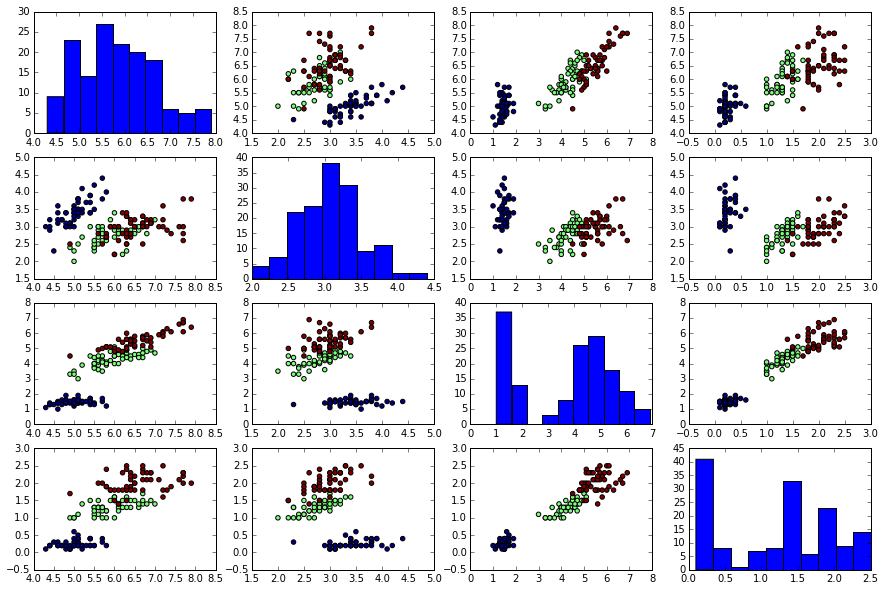

In [1]:
## ANSWER HERE: Code that plots figure (see Lab 2)
%matplotlib inline

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X=iris

X=iris.data
Y=iris.target

## Plot here
count=1
fig = plt.figure(figsize=(15,10))

for i in range(0,4):

    for j in range (0,4):

        ax = fig.add_subplot(4,4,count)
        if i == j:
            plt.hist(X[:,i])
        else:
            ax.scatter(X[:, j], X[:, i], c=Y)

        count+=1


### Question: what conclusions can you come to after looking at this plot?
- e.g., which classes can be easily separated by just looking at some of these plots? Which can not?

### <span style="color:green">We can see that Setosa (Blue), can be more easily distinguished from Verginica (Red) and Versicolour (Green). Verginica and Versicolour have a lot more crossover, and can't be as easily seperated. </span>

### Task:  Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more difficult.  

Try to perturb your data with some Gaussian noise, e.g. by

    `X=X+np.random.normal(0,0.5,X.shape)`
    
and then plot the data again.  Do this is the cell provided below.

### <span style="color:red">Edit  cell below with your answer</span>

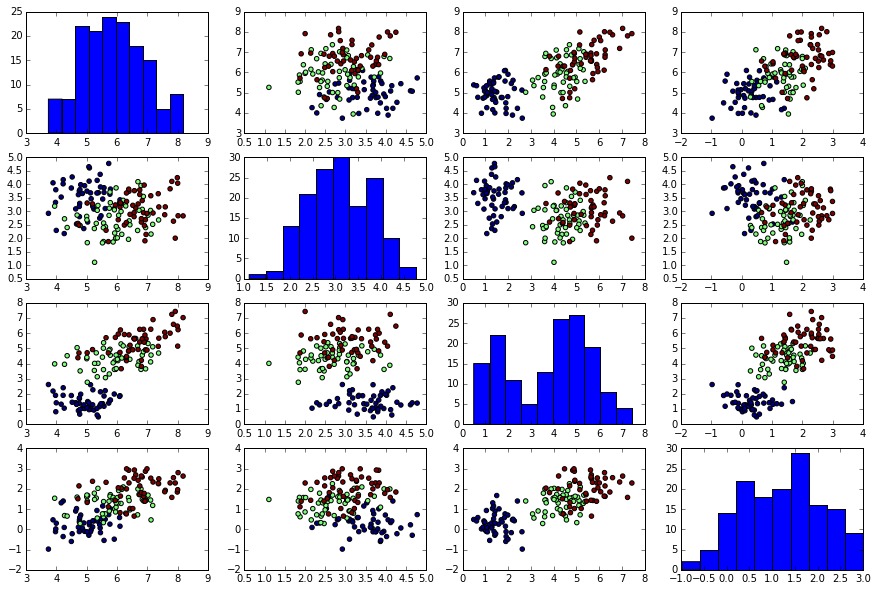

In [2]:
## ANSWER (CODE) HERE: Code that plots figure (see Lab 2)
## ADD NOISE HERE
X= X + np.random.normal(0,0.5,X.shape)
    
## PLOT HERE
count=1
fig = plt.figure(figsize=(15,10))

for i in range(0,4):

    for j in range (0,4):

        ax = fig.add_subplot(4,4,count)
        if i == j:
            plt.hist(X[:,i])
        else:
            ax.scatter(X[:, j], X[:, i], c=Y)

        count+=1


###  Question.  What do you observe? What has changed with respect to the conclusion you arrived at by looking at the plots before adding noise?

### <span style="color:green">The clusters of data are now more spread out, and less concentrated. We see a lot more cross over between the classes in the scatter graphs. The histograms still show some of the same peaks, however there are less steep jumps in data. The noisier data is slightly more averaged, as you'd expect.</span>

## 2. Implementing kNN

You have already worked with k Nearest Neighbour (kNN) classification during the labs (Labs 3-4), using sklearn's version of the classifier.  This task deals with implementing your own version of k-nearest neighbour (kNN) classification.   

kNN simply checks the distance of a test point, $x^*$ with respect to all data points in the training set $X$, finds the ''closest'' point to $x^*$ in our training data (with the smaller error), and assigns the label of the ''closest'' point to $x^*$.  This is in case we are looking at just one neighbour.  If we are looking at, say k=3 neighbours, then we need to perform some kind of majority voting to decide upon the label for $x^*$.

Here is a basic pseudocode for k-NN:
- Input: training data $X$, class labels $y$, testing data point $x^*$
- Get distance of $x^*$ to every training datum $x_i \in X$
- Select k nearest data points in training data ($x_i \in X$) to $x^*$ according to distance function
- Return $y^*$, the predicted label for $x^*$, a function of the labels of the k-nearest neighbours in the training data.  
 - e.g., if k=1 then we can just return the label of the nearest neighbour in X
 - otherwise, if k>1, a simplistic approach is to just take the majority class in the nearest neighbours
 
 
**Task:  In the cell below, implement your own version of k-NN (note: we use the parameter n to set the number of neighbours instead of k in the code)**
- Use ** at least ** two functions to measure the distance of a test point $x^*$ to a point in the training data, $x_i$
 - E.g., the euclidian distance and the l1-norm (absolute value)
- When done, print the accuracy on the testing set, as well as the confusion matrix below

*Note: one of the numpy methods you might need is `argsort`, that returns the sorted index of a 1D-array of values *

### <span style="color:red">Edit  cell below with your answer</span>

In [3]:
#References http://www.kdnuggets.com/2016/01/implementing-your-own-knn-using-python.html/3
#References http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

## ANSWER HERE: Suggested code structure in comments below

# LOAD IRIS DATASET HERE
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import math
from collections import Counter

iris = datasets.load_iris()
X=iris.data
Y=iris.target
 
##=== FUNCTION DEFINITIONS  ===##

# Use function train_test_1 split you wrote for Lab 3 that splits data into a training and testing set
# we need this function to return just the indices of our data that correspond to testing/training set
def split_train_test_1(X,test_size,rand_seed): #Takes iris.data, test size is a scalar float from 0. - 1., and the random seed
    np.random.seed(rand_seed) #Create random seed
    indices= np.random.permutation(X.shape[0]) #indices is an array containing the indices from iris.data in a random order    
    testLen=np.floor(test_size*X.shape[0]).astype(int) #testLen is the number of indexes we want to split as the test data. We get this by multiplying the scalar test_size and mupltiplying it by the size of X
    
    idxTrain=indices[:-testLen] #idxTrain is all the random iris.data indices up to testLen 
    idxTest=indices[-testLen:] #idxTest is all the remaining data
    
    assert not np.intersect1d(idxTest,idxTrain) #This stops idxTrain and idxTest from using any of the same indices
    assert(len(idxTrain)+len(idxTest)==X.shape[0])
    
    Xtrain=X[idxTrain] #This takes the indices from idxTrain, and assigns them to corresponding feature data from iris.data
    Xtest=X[idxTest] #This takes the indices from idxTest, and assigns them to corresponding feature data from iris.data
    Ytrain=Y[idxTrain] #This takes the indices from idxTrain, and assigns them to corresponding feature data from iris.target
    Ytest=Y[idxTest] #This takes the indices from idxTest, and assigns them to corresponding feature data from iris.target
    
    return (Xtrain,Xtest,Ytrain,Ytest)


#define distance functions: given two vectors (ndarrays), this function returns the distance between them
#Write at least two distance functions, measuring the squared error between your data and the absolute value error.
#You can implement both of these by looking at the numpy.linalg.norm method, or implement your own version. 
def euclideanDistance(in1, in2):
    points = zip(in1, in2) #puts the two data points together
    diffs_squared_distance = [pow(a - b, 2) for (a, b) in points] #gets a - b squared
    return math.sqrt(sum(diffs_squared_distance)) #returns the square root of the sum


#The get neighbours function  returns the nearest neighbour indices in X of the test point x_.  In more detail
# Input: x_ : point in test data
#       X   : training data
#       n   : number of neighbours to return
#       T   : total number of training data
# Output: n-nearest neighbours of x_ in training data 
def getNeighbours(x_,X,n): 
    distances = [getTupleDistance(trainIn, x_) for trainIn in X] #fills distances array with the euclidean distance between x_ and trainIn, where trainIn is each data point in X
    sortedDistances = sorted(distances, key=itemgetter(1)) #sorts the distances array which contains an array with distance for each training instance
    sortedTrainingInstances = [tuple[0] for tuple in sortedDistances]
    return sortedTrainingInstances[:n] # returns the indices of n-nearest neighbours in training data, without the distances
 
def getTupleDistance(training_instance, test_instance): #calls the euclidean distance as a tuple
    return (training_instance, euclideanDistance(test_instance, training_instance[0]))

# The assign label function returns the assigned label for a test data point, given the labels of nearest neighbours
# Input: nLabels : labels (classes) of nearest neighbours of a test point
# Output: the assigned label
# e.g., if we have n=1 (one neighbour), then we can just return the label of the nearest neighbour
# else, we can e.g., choose the majority class
def assignLabel(nLabels): #takes the output from getNeighbours, which is the indices of the nearest neighbours
    classes = [nLabel[1] for nLabel in nLabels] #creates an array - classes, which stores the class data from nLabels, which is the nearest neighbours
    count = Counter(classes) #creates count variable an runs the Counter function with the array of classes
    return count.most_common()[0][0] # returns the most common class, e.g if the 3 nearest neighbours are 2 of class A, and 1 of class B, then the most common class is A

def getAccuracy(Ytest, predictions): #Tests the accuracy using Ytest, which contains the index of classes, and the predictions array, which contains the most common classes
    correct = 0
    for i in range(len(Ytest)): #For all data in the test classes
        if Ytest[i][-1] == predictions[i]: #if the test classes are the same as the predicted classes
            correct += 1 #Incredment the correct variable
    return (correct/float(len(Ytest))) * 100.0 #Calculate the percentage of correct predictions divided by the total test amount

##=== FUNCTION DEFINITIONS (END)  ===##

#use function to split data to training and testing - use 20% of the dataset for testing, 80% for training 
Xtrain, Xtest, Ytrain, Ytest = split_train_test_1(X,0.2,1) #Call split_train_test and return the values into Xtrain, Xtest, Ytrain, Ytest

train = np.array(zip(Xtrain,Ytrain)) #Create train array containing both Xtrain and Ytrain
test = np.array(zip(Xtest, Ytest)) #Create test array contraining both Xtest and Ytest

predictions = [] #Empty predictions array
k = 5 #Number of neighbours
 
for i in range(len(Xtest)): #For all the test data

    #neighbours = getNeighbours(test[i][0],train, k)
    neighbours = getNeighbours(Xtest[i],train, k) #Call the get neighbours function for each index in the test data
    majority_vote = assignLabel(neighbours) #Call assignLabel 
    predictions.append(majority_vote) #Store output from assignLabel in predictions array
    
print '\nAccuracy : ' + str(getAccuracy(test, predictions)) + "\n" #Print the output from getAccuracy, given all the test data and the predictions


classNo=len(np.unique(Y)) #Creates a 3 x 3 array filled with zeros
C= np.zeros((classNo,classNo),dtype=np.int) # initialize the confusion matrix to zeros

for i in range(0,len(Ytest)): #Populates the confusion matrix using the test classes, and the predicted classes
    C[Ytest, predictions[i]]+=1
print C.astype(int)


Accuracy : 96.6666666667

[[10 12  8]
 [10 12  8]
 [10 12  8]]


## 3. Nested Cross-validation using your implementation of KNN

The final part of this coursework links the work you 've done so far with Lab 4, where you implemented nested cross-validation.

** If you need a refresher on nested cross-validation, then read the notes on the notebook for Lab 4 (LB 04 NB05 Cross Val) again.**

In summary, nested cross validation splits the dataset into k-folds, where we have a training set, a testing set and a validation set.  We train on the training data, pick our parameters on the validation data and evaluate our model on the testing data for each fold, similary to Lab 4.

For this task, you need to **implement 5-fold nested cross-validation, evaluating the appropriate number of neighbours (n) from 1 to 10, as well as the distance function that performs the best (at least euclidian distance and the absolute value error - l1 norm)**.

Furthermore, you need to **evaluate the performance of the model (i) on the data as loaded from the iris data, and (ii) on the same data pertrubed with Gaussian noise (by adding noise when loading the dataset**, `X=X+np.random.normal(0,0.5,X.shape)` )

Finally, you need to come up with ** some way of dealing with cases where there is a tie: for example, you take two nearest neighbours (n=2) with the labels [1,2].  Which label would you choose in this case? **

If you correctly completed the coursework thus far and completed Lab 4, then essentially all you are left with is to combine code that you have already written and evaluate.

When done your code should print:
- For each fold, the accuracy on the validation set depending on parameter choice
- For each fold, accuracy/confusion matrix on testing set with parameters choosen by validation set (above)
- When done with all folds,
 - The total confusion matrix over all folds
 - The average accuracy and standard deviation of all folds (see numpy.mean and numpy.std)


### <span style="color:red">Edit  cell below with your answer</span>

In [6]:
#References http://www.kdnuggets.com/2016/01/implementing-your-own-knn-using-python.html/3
#References http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

## IMPLEMENTATION HERE
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
X=iris.data
Y=iris.target

#add noise if the following variable is set to True
ADD_NOISE = False 

## Functions ##
def cross_val_index(X,k,rand_seed): #Function creates the arrays containing the test, train and validation indices
    np.random.seed(rand_seed)
    indices= np.random.permutation(X.shape[0]) #Randomize the indices in iris.data
    indicesSplit = np.array_split(indices, k) #Split into k folds

    kSize = indicesSplit[k-1].size #kSize is the size of how many indices are within each fold
    
    testIndex  = np.zeros((k, kSize)) #Creates zero arrays with dimensions k and kSize for the test data
    valIndex   = np.zeros((k, kSize)) #Creates zero arrays with dimensions k and kSize for the validation data
    trainIndex = np.zeros((k, (kSize * (k-2)))) #Creates zero arrays with dimensions k, and kSize multiplies by k-2, for the train data 
    #e.g if X had 10 indices, and k was 5, the first two indices would be test, the third and fourth would be validation, and the remaining six ,which is kSize * 5-2,, would be for train data
    
    for i in range(0,k): #For each fold k
        for i3 in range(0, kSize): #For kSize, which are used by test and val
            testIndex[i][i3] = indicesSplit[i][i3]#testIndex, fold ,index,is given the data from indicesSplit,fold,index,
            valIndex[i][i3] = indicesSplit[(i+1)%k][i3] #valIndex,fold,index, is given the data from indicesSplit,fold + plus 1, modulo fold,index. This means the validation uses the next index after test, and wraps using modulo
        for i1 in range(0,k-2): #For the training indices
            i2 = i1*2; 
            trainIndex[i][i2]   = indicesSplit[(i+2+i1)%k][0] #These lines fill trainIndex with the indicesSplit using the data that wasn't used for test or validation.
            trainIndex[i][i2+1] = indicesSplit[(i+2+i1)%k][1] 
    
    return trainIndex, testIndex, valIndex #return the indices for train, test and validation

def cross_val_assign(trainIndex, testIndex, valIndex, X, Y): #Function takes the train, test and validation indices, and splits the iris.data and iris.target using those indices     
    Xtest = np.zeros((k, testIndex[0].size, X[0].size)) #Create zero arrays with dimensions k folds, number of training data, and size of iris.data
    Ytest = np.zeros((k, testIndex[0].size, Y[0].size)) #Create zero arrays with dimensions k folds, number of training data, and size of iris.target

    Xval = np.zeros((k, valIndex[0].size, X[0].size)) #Create zero arrays with dimensions k folds, number of validation data, and size of iris.data
    Yval = np.zeros((k, valIndex[0].size, Y[0].size)) #Create zero arrays with dimensions k folds, number of validation data, and size of iris.target

    Xtrain = np.zeros((k, trainIndex[0].size, X[0].size)) #Create zero arrays with dimensions k folds, number of test data, and size of iris.data
    Ytrain = np.zeros((k, trainIndex[0].size, Y[0].size)) #Create zero arrays with dimensions k folds, number of test data, and size of iris.target

    for i in range(0,k): #For each fold k
        for i1 in range (0,testIndex[0].size): #For all the test indices
            for i2 in range (0, 4): #For each of the 4 features of the data in iris.data
                Xtest[i][i1][i2] = X[testIndex[i][i1]][i2] #Take the data from iris.data using the test indices
            Ytest[i][i1] = Y[testIndex[i][i1]] #Take the data from iris.target using the test indices
            
        for i1 in range (0,valIndex[0].size): #For all the validation indices
            for i2 in range (0, 4): #For each of the 4 features of the data in iris.data
                Xval[i][i1][i2] = X[valIndex[i][i1]][i2] #Take the data from iris.data using the validation indices
            Yval[i][i1] = Y[valIndex[i][i1]] #Take the data from iris.target using the validation indices
            
        for i1 in range (0,trainIndex[0].size): #For all the training indices
            for i2 in range (0, 4): #For each of the 4 features of the data in iris.data
                Xtrain[i][i1][i2] = X[trainIndex[i][i1]][i2] #Take the data from iris.data using the training indices
            Ytrain[i][i1] = Y[trainIndex[i][i1]] #Take the data from iris.target using the training indices
    
    return Xtest, Ytest, Xval, Yval, Xtrain, Ytrain #Return the split data

if ADD_NOISE: #Check ADD_NOISE 
    X=X+np.random.normal(0,0.5,X.shape) #Perturb the data with gaussian noise

k = 5 #Number of folds
numN = 10 #Number of neighbours

trainIndex,testIndex,valIndex=cross_val_index(X,k,0) # get indices
Xtest, Ytest, Xval, Yval, Xtrain, Ytrain = cross_val_assign(trainIndex, testIndex, valIndex, X, Y) # assign indices

modelAcc = 0; #Model Accuracy
classNo=len(np.unique(Y))
modelC= np.zeros((classNo,classNo),dtype=np.float)

for i in range(0,k): #For k folds
    print "validation step for fold", i
    accuracySum = 0 #Sum of accuracy
    bestN = 0 #Best number of neighbours
    for n in range (1, 10): #For 1 - 10, being the number of neighbours
        classifier=KNeighborsClassifier(n) #initialize k-NN with n nearest neighbours
        classifier.fit(Xtrain[i], Ytrain[i]) #Find nearest neighbours of Xtrain,fold], Ytrain,fold, with n nearest neighbours
        pred=classifier.predict(Xval[i]) #Predict the class of validation data,fold,
        
        #Test the train data against the validation data
        sum = 0
        for i1 in range (0,pred.size): #Find the accuracy of n number of neighbours with the validation data
            if(pred[i1]==Yval[i][i1]):
                sum+=1
        accuracy = float(sum)/float(Yval[i].size)
        
        if(accuracy > accuracySum): #Find the best accuracy of all the n-NN, stores the best n
            accuracySum = accuracy
            bestN = n
        print "validation accuracy with n = ", n, accuracy    
        
    print "Best number of neighbours ", bestN #Prints the most accurate number of n, between 1 - 10
    
    #Test the train data against the test data    
    classifierWithBestN = KNeighborsClassifier(n_neighbors = bestN) #initialize k-NN with the best num of  nearest neighbours
    classifierWithBestN.fit(Xtrain[i], Ytrain[i]) #Find nearest neighbours of Xtrain,fold, Ytrain,fold, with bestN nearest neighbours
    predWithBestN= classifierWithBestN.predict(Xtest[i]) #Predict the class of test data,fold
    
    #Find the accuracy of the entire model, using the best number of neighbours, using the testing data
    sum = 0
    for i1 in range (0,predWithBestN.size):
        if(predWithBestN[i1] == Ytest[i][i1]):
            sum+=1
    print(sum, Ytest[i].size)        
    accuracyWithBestN = float(sum)/float(Ytest[i].size)
    
    print "Test accuracy and confusion matrix"
    print accuracyWithBestN
    modelAcc+=accuracyWithBestN

    classNo=len(np.unique(Y))
    C= np.zeros((classNo,classNo),dtype=np.int) # initialize the confusion matrix to zeros

    for i1 in range(0,Ytest[i].size):
        C[int(Ytest[i][i1])][int(predWithBestN[i1])]+=1
        modelC[int(Ytest[i][i1])][int(predWithBestN[i1])]+=1
    print C.astype(int)
    
print "Model Accuracy = ", modelAcc/k
for i in range(0, 3):
    for i1 in range(0, 3):
        modelC[i][i1]/=k
    
print modelC.astype(float)
            

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:51: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:52: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:56: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:61: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result 

validation step for fold 0
validation accuracy with n =  1 0.8
validation accuracy with n =  2 0.533333333333
validation accuracy with n =  3 0.633333333333
validation accuracy with n =  4 0.633333333333
validation accuracy with n =  5 0.166666666667
validation accuracy with n =  6 0.166666666667
validation accuracy with n =  7 0.166666666667
validation accuracy with n =  8 0.166666666667
validation accuracy with n =  9 0.166666666667
Best number of neighbours  1
(27, 30)
Test accuracy and confusion matrix
0.9
[[11  0  0]
 [ 0 13  0]
 [ 0  3  3]]
validation step for fold 1
validation accuracy with n =  1 0.933333333333
validation accuracy with n =  2 0.933333333333
validation accuracy with n =  3 0.666666666667
validation accuracy with n =  4 0.666666666667
validation accuracy with n =  5 0.666666666667
validation accuracy with n =  6 0.666666666667
validation accuracy with n =  7 0.333333333333
validation accuracy with n =  8 0.333333333333
validation accuracy with n =  9 0.3333333333

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:85: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:85: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:85: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:85: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:85: DataConversionWarning: A column-vector y was passed when

### Question: Writeup regarding your implementation: any implementation details, description of how you implemented nested cross-validation, description on how you implemented k-NN

### <span style="color:green">Implementing k-NN was actually a lot harder than I thought it would be. I found throughout this whole coursework, the biggest problem was actually keeping track of variable types. Since Python doesn't use declared types, it gets difficult understanding what data types you're using at different points, especially because numpy uses ndarray's, and it get's to the point that you're using arrays of arrays of arrays, some of which contain actual feature data, others are just used to store index values which will then be used to process the feature data. It becomes really abstract and difficult to visualise.

k-NN: Rather than creating a k-NN class, with member functions, I just created a number of functions that would perform k-NN. These functions are getNeighbours(), getTupleDistance(), euclideanDistance(), assignLabel(). GetNeighbours() takes the point of test data x_, and calculates the euclidean distance between that point and each of the points in the training data. It stores these distances in an array, and then sorts the array in order of distances, from smallest to largest. It then returns the first n indices in the distances array, where n is the number of neighbours. AssignLabel takes the neigbours array a calculates for how many classes there are, which is the most common. This is used as the predicted class. We then test the accuracy of the prediction against the test data.

Cross Validation: We split the data into test, validation and train, for k number of folds. I understand how this works, and the functions for splitting the data worked, but they wouldn't work with my k-NN classifier. This error is to do with the dimensions of the array being outputted by the cross-val split, as the k-NN classifier wants different dimensions. I tried so many things to try to overcome the problem, from changing the classifier, to changing the split functions, I even tried making a completely new classifier from scratch, but to no avail. Ultimately i decided to show the cross validation split functions working with the scikit k-NN classifier, as for some reason, it works with that one still. If I could go back and do it again, I would make my k-NN classifier as similar to scikit classifier as possible, in order to try to overcome to dimensionality issues.
 
I had so many problems using ipython notebook, as it would either continue running code that had errors, or it wouldn't run working code. The kernels kept crashing, without me knowing. This meant I would edit my code, regularly checking it was working, and thinking it was genuinely working. I would then comment out a key function, or intentionally put in an erro, and realise it was still working just the same, and it shouldn't have been. It wasted so much of my time dealing with these sorts of errors.
</span>

### Question: Paste the total confusion matrices and average accuracy/standard deviation over all folds for the clean data and noisy data case in the cell below.  Which are your conclusions?  

### <span style="color:black">validation step for fold 0
validation accuracy with n =  1 0.8
validation accuracy with n =  2 0.533333333333
validation accuracy with n =  3 0.633333333333
validation accuracy with n =  4 0.633333333333
validation accuracy with n =  5 0.166666666667
validation accuracy with n =  6 0.166666666667
validation accuracy with n =  7 0.166666666667
validation accuracy with n =  8 0.166666666667
validation accuracy with n =  9 0.166666666667
Best number of neighbours  1
(27, 30)
Test accuracy and confusion matrix
0.9
[[11  0  0]
 [ 0 13  0]
 [ 0  3  3]]
validation step for fold 1
validation accuracy with n =  1 0.933333333333
validation accuracy with n =  2 0.933333333333
validation accuracy with n =  3 0.666666666667
validation accuracy with n =  4 0.666666666667
validation accuracy with n =  5 0.666666666667
validation accuracy with n =  6 0.666666666667
validation accuracy with n =  7 0.333333333333
validation accuracy with n =  8 0.333333333333
validation accuracy with n =  9 0.333333333333
Best number of neighbours  1
(26, 30)
Test accuracy and confusion matrix
0.866666666667
[[ 5  0  0]
 [ 0  6  4]
 [ 0  0 15]]
validation step for fold 2
validation accuracy with n =  1 0.966666666667
validation accuracy with n =  2 0.933333333333
validation accuracy with n =  3 1.0
validation accuracy with n =  4 0.9
validation accuracy with n =  5 0.833333333333
validation accuracy with n =  6 0.8
validation accuracy with n =  7 0.8
validation accuracy with n =  8 0.466666666667
validation accuracy with n =  9 0.466666666667
Best number of neighbours  3
(28, 30)
Test accuracy and confusion matrix
0.933333333333
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
validation step for fold 3
validation accuracy with n =  1 0.933333333333
validation accuracy with n =  2 1.0
validation accuracy with n =  3 0.933333333333
validation accuracy with n =  4 0.7
validation accuracy with n =  5 0.7
validation accuracy with n =  6 0.7
validation accuracy with n =  7 0.7
validation accuracy with n =  8 0.333333333333
validation accuracy with n =  9 0.333333333333
Best number of neighbours  2
(28, 30)
Test accuracy and confusion matrix
0.933333333333
[[14  0  0]
 [ 0  6  0]
 [ 0  2  8]]
validation step for fold 4
validation accuracy with n =  1 0.9
validation accuracy with n =  2 0.9
validation accuracy with n =  3 0.833333333333
validation accuracy with n =  4 0.766666666667
validation accuracy with n =  5 0.766666666667
validation accuracy with n =  6 0.366666666667
validation accuracy with n =  7 0.366666666667
validation accuracy with n =  8 0.366666666667
validation accuracy with n =  9 0.366666666667
Best number of neighbours  1
(28, 30)
Test accuracy and confusion matrix
0.933333333333
[[10  0  0]
 [ 0  9  2]
 [ 0  0  9]]
Model Accuracy =  0.913333333333
[[ 10.    0.    0. ]
 [  0.    8.4   1.6]
 [  0.    1.    9. ]]</span>

### Question: Paste the best neighbour parameters selected for cross-validation over all folds in the cell below, along with the respective validation accuracy per fold
-  How does this change over all folds? Can you say that one parameter selection is better regardless of data?  
-  Does the best parameter choice change depending on whether we use clean or noisy data?

### <span style="color:red">Edit this cell with your answer</span>

### Question: Which distance functions did you use?  Did you notice any changes between using noisy and clean data regarding choice of distance function?  Use the resulting total confusion matrices / total accuracy to justify any conclusions.

### <span style="color:red">I used euclidean distance throughout. The accuracy was higher with non-noisey data with euclidean distance.</span>

### Question: What happens in case of a tie? 
- E.g., you select n=2 (two nearest neighbours), with labels [1,2].  Which label would you pick?

### <span style="color:red">Ideally I would add an additional function, but didn't get that far.</span>

### Question:  Assume you were to implement a variant of k-NN that weighs each nearest neighbour by some value before deciding upon the label to assign.  Can you think of possible ways to assign a weight on each neighbour?

### <span style="color:red">REFERENCES: http://www.kdnuggets.com/2016/01/implementing-your-own-knn-using-python.html/3

http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

I worked along side James Hardy during this project. During lab weeks I worked with Sam Park-Wolfe and James Hardy. </span>